# Digital DNA - python
## Getting Started
This package provides a set of utilities and algorithms for online social bot detection based on the paper [Social Fingerprinting: Detection of Spambot Groups Through DNA-Inspired Behavioral Modeling](https://ieeexplore.ieee.org/document/7876716)

### import libraries
Let's start importing libraries

In [28]:
import digitaldna as ddna
import csv
from digitaldna import Verbosity
from digitaldna import SequencePlots
import pandas as pd
import numpy as np
from digitaldna.lcs import LongestCommonSubsequence
from os import listdir
import os
from matplotlib import pyplot as plt
import time
from digitaldna import SequencePlots

### Sequence your first Digital DNA from Twitter. 
Sequencing timelines according to actions and content.

The package could work both with timelines json ...


In [29]:
from digitaldna import TwitterDDNASequencer

filepath = os.path.join(os.getcwd(), "timelines.json")
model = TwitterDDNASequencer(input_file=filepath, alphabet='b3_type')
data = model.fit_transform()

In [30]:

df = pd.DataFrame({"user_id": data[:, 0],
              "dna": data[:, 1]})
df

,user_id,dna
0,48062712,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCC...
1,2479063608,AAAAATCTACTAAATATTTTAAATCAAACTTCCAACTAACTAATTC...
2,22834067,ACACCCAAAAACACCCCACAACAAACAAAAAACCACACACAACAAA...
3,4289404586,AAAAAAAAACAAAACCAACCCCACAACCCCAAAAAACTCCAACAAA...
4,615597661,AAAAAAAAAAACAAACCAAAACAAAAAAAAAAAAAATAATAAATTA...
5,1135017996,ACACAAATTTACTAAAATTTCAACTTCATATTTTTATCAAAATAAA...


.. and with already sequenced timelines.

In [19]:
filepath = os.path.join(os.getcwd(), "italian_retweets_users_sequences_new.csv")
df = pd.read_csv(filepath)
del df['bot']
df

,user_id,tweet_count,dna,retweets(%)
0,1123481,3208,AACCCCCCACAACCCCCCCCCCACACATCAATCCCACCCCCAACCA...,62
1,3500831,3214,CCTTACCCCTACTACTTCAAACCAAACAAAACAACCCATCTCCCTT...,27
2,14871003,3193,CCTACATACCCCCTCCAAACCACCCACACCACAACCCCCCCCCCCC...,66
3,14906561,3204,ACCCCACCCCCCCAAAAAAAACCCCCCCCAAAAACCCCCAACCCCA...,58
4,17880873,3212,CCCCTCCTCCCTTCCCTCTTTCCACTCCCTCTCCTTTCCTTTCCCC...,44
...,...,...,...,...
733,1012308408748396544,2544,CACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,98
734,1012332423290478593,1181,CCCCCACCCCCACCCCCCCCACACCCACCCCCACCACCCCCCCCCC...,92
735,1012447780504326145,2175,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,94
736,1012607637026983936,555,CCCCCCCCCCCCCCCCCCCTCCCCCCCCCCCCCCCCCCTCCCCTCC...,70


### Plot sequence distribution
Alphabet distribution shows the users’ “actions” in the database.

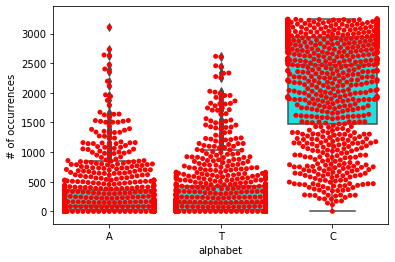

In [16]:
plotter = SequencePlots(alphabet='b3_type')
plotter.plot_alphabet_distribution(df["dna"])

## LCS and bot detection analysis
Thanks to the `digitaldna` it is possible to identify bots (automated accounts) based on extracted LCSs.

In [25]:
est = LongestCommonSubsequence(in_path='', out_path='/tmp/glcr_cache', overwrite=False, threshold='auto', window=10, verbosity=2)
y = est.fit_predict(df["dna"])
df["bot"] = y

fitting...
finding cut...
predicting...
done.


In [18]:
df[:10]

,user_id,tweet_count,dna,bot,retweets(%)
0,1123481,3208,AACCCCCCACAACCCCCCCCCCACACATCAATCCCACCCCCAACCA...,False,62
1,3500831,3214,CCTTACCCCTACTACTTCAAACCAAACAAAACAACCCATCTCCCTT...,False,27
2,14871003,3193,CCTACATACCCCCTCCAAACCACCCACACCACAACCCCCCCCCCCC...,False,66
3,14906561,3204,ACCCCACCCCCCCAAAAAAAACCCCCCCCAAAAACCCCCAACCCCA...,False,58
4,17880873,3212,CCCCTCCTCCCTTCCCTCTTTCCACTCCCTCTCCTTTCCTTTCCCC...,False,44
5,19017283,3170,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,True,100
6,20432064,3195,TCTTTAACAACCACACAACCCCAAAAAAAATCCCCCAAAACACACC...,False,67
7,22009205,3209,TTTTATAATAATCCCCTCCATATCTCCTCTTTTCATATCTTTTTTC...,False,20
8,25851958,3204,TTACACTTACAACCACTCTACATTCCCACTTTTATTACCCACCTTA...,False,45
9,32604352,2463,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCACCCC...,False,79


### LCS linear plot
Plots the longest common subsequence curve of number of accounts on x-axys and sequence length on y-axys. Orange threshold can be assigned or computed over the smoothed curve of LCSs and highlights possible automated accounts on its left.

<module 'matplotlib.pyplot' from '/Users/salvob/anaconda3/envs/sage_demo/lib/python3.7/site-packages/matplotlib/pyplot.py'>

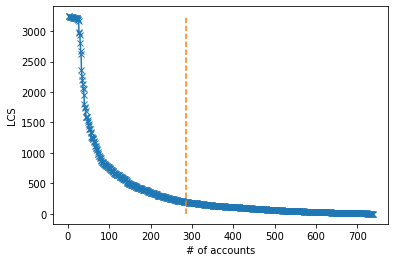

In [26]:
est.plot_LCS()

### LCS logarithmic plot
Plots the longest common subsequence curve as log(number of accounts), log(sequence length).

LCS lengths (y axes) and the number of accounts who share the same LCS length (x axes) are logarithmic transformed in order to easily visualise patterns:
    - Plateaux in the curve highlight homogenous groups of highly similar accounts.
    - Steep decreasing in the curve indicates that groups of accounts are different.


<module 'matplotlib.pyplot' from '/Users/salvob/anaconda3/envs/sage_demo/lib/python3.7/site-packages/matplotlib/pyplot.py'>

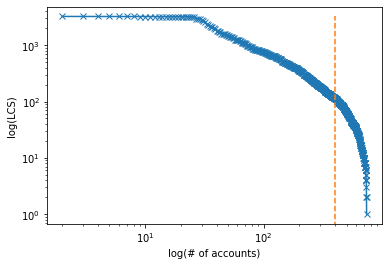

In [24]:
est.plot_LCS_log()

## Entropy plot
### Intrasequence plot
Intra-sequence entropy boxplot shows the distribution of Shannon entropy computed over each timeline.


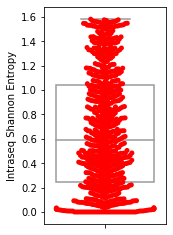

In [27]:
plotter = SequencePlots(alphabet='b3_type')
intra_seq = plotter.plot_intrasequence_entropy(df["dna"])

### Intersequence plot
 - Inter-sequence entropy plot (right) shows entropy calculated for each timeline’s position. The same action in the same position means low entropy value thus a interesting pattern.
 - Inter-sequence entropy boxplot (left) shows the distribution of Shannon entropy in each timeline computed over each timeline index.



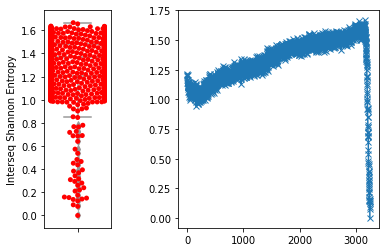

In [11]:
inter_seq = plotter.plot_intersequence_entropy(df["dna"])

### Plot Sequence Color
Color sequence allows to easily identify suspicious patterns: large blocks of the same colour highlight high likelihood that several accounts act synchronically. 

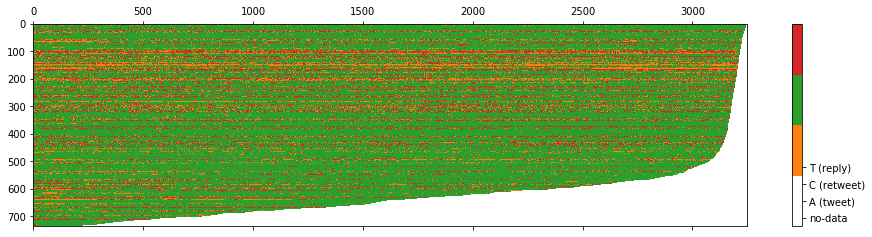

In [12]:
plotter.plot_sequences_color(df["dna"])